In [34]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, balanced_accuracy_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

X = pd.read_excel("breast_cancer_sans_diag.xlsx",sheet_name=0,header=0)

print(X.shape)

T = X.describe()  #on représente les statistiques descriptives
print(T)

(569, 31)
                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.0

In [35]:
X_numeric = X.select_dtypes(include=['number'])

print(X_numeric.mean()) 
print(X_numeric.var())

id                         3.037183e+07
radius_mean                1.412729e+01
texture_mean               1.928965e+01
perimeter_mean             9.196903e+01
area_mean                  6.548891e+02
smoothness_mean            9.636028e-02
compactness_mean           1.043410e-01
concavity_mean             8.879932e-02
concave points_mean        4.891915e-02
symmetry_mean              1.811619e-01
fractal_dimension_mean     6.279761e-02
radius_se                  4.051721e-01
texture_se                 1.216853e+00
perimeter_se               2.866059e+00
area_se                    4.033708e+01
smoothness_se              7.040979e-03
compactness_se             2.547814e-02
concavity_se               3.189372e-02
concave points_se          1.179614e-02
symmetry_se                2.054230e-02
fractal_dimension_se       3.794904e-03
radius_worst               1.626919e+01
texture_worst              2.567722e+01
perimeter_worst            1.072612e+02
area_worst                 8.805831e+02


Visualisation comme sur l'exemple de : https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

On visualise selon nos caractéristiques (mean, std, worst)

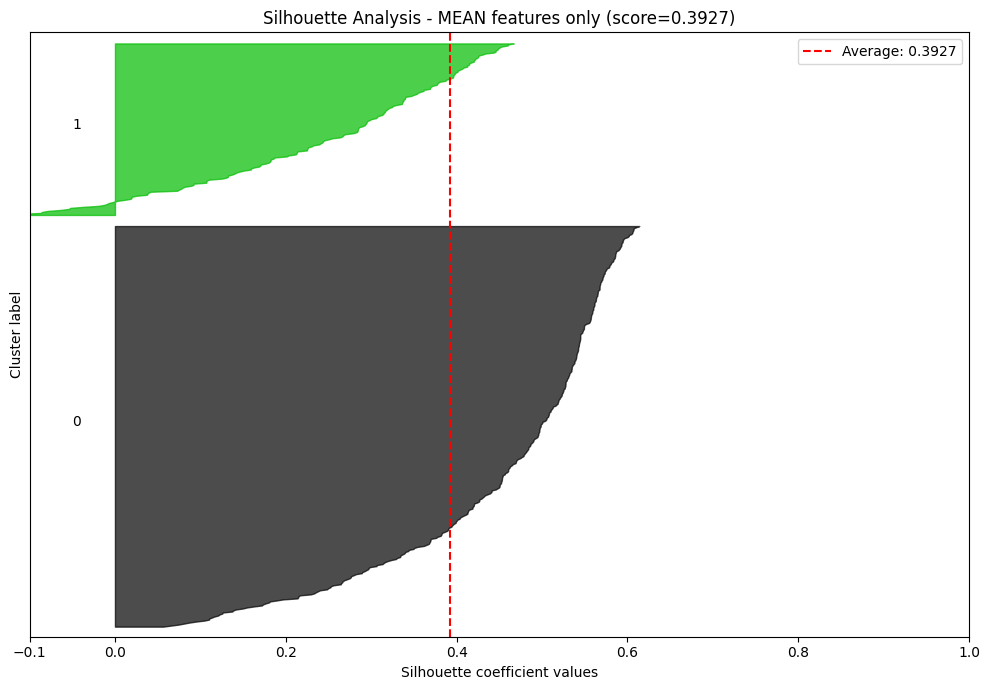

Silhouette score (MEAN features): 0.3927
Nombre de features: 10
Features utilisées: ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']



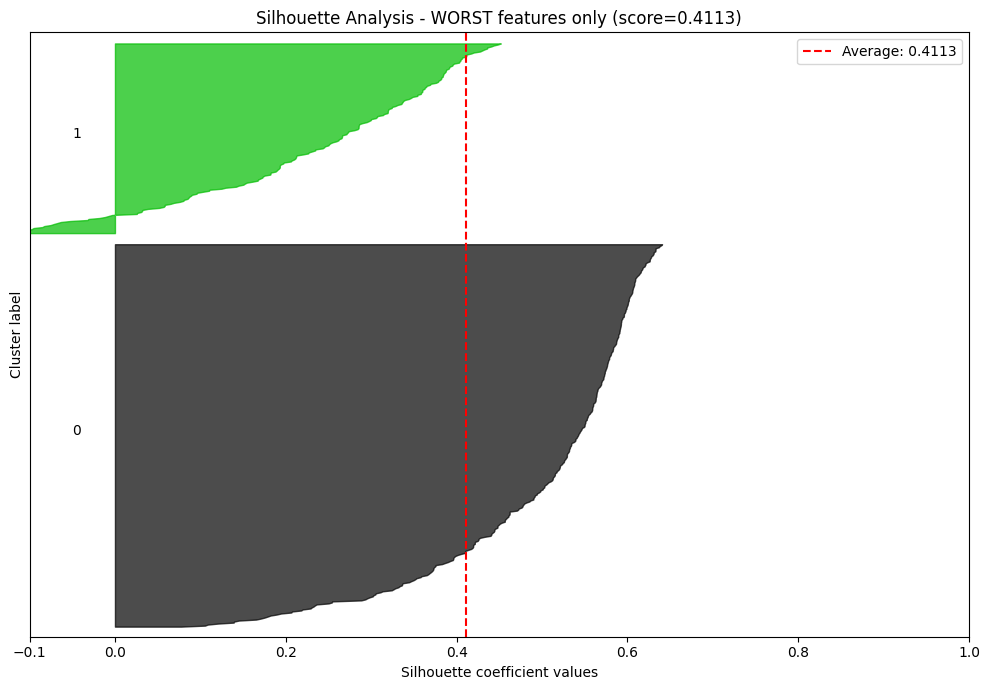

Silhouette score (WORST features): 0.4113
Nombre de features: 10
Features utilisées: ['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']



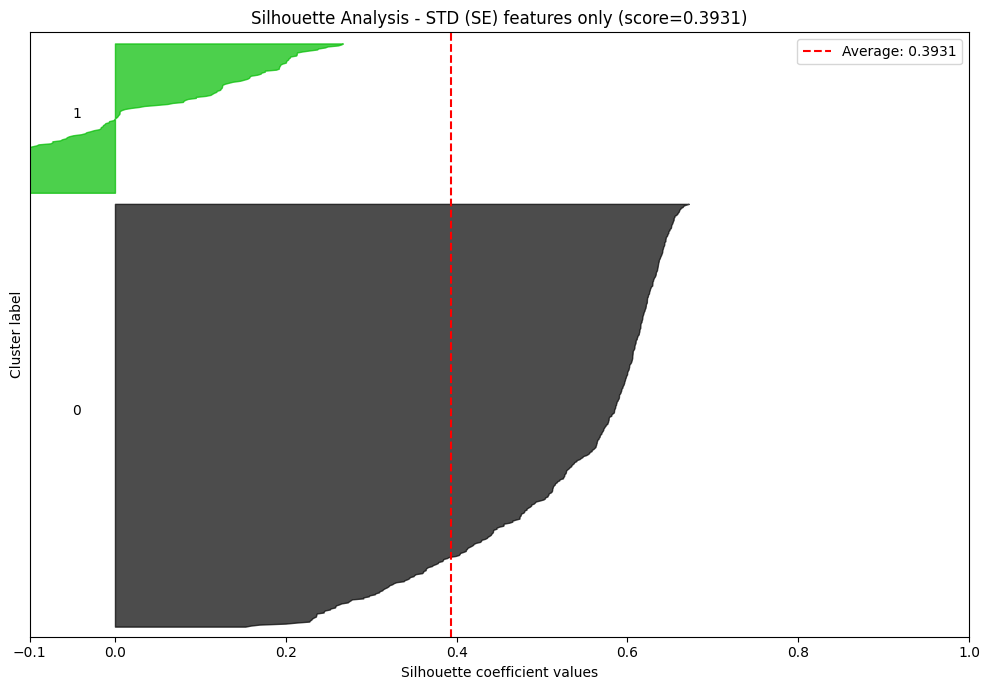

Silhouette score (STD features): 0.3931
Nombre de features: 10
Features utilisées: ['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se']



In [36]:

# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Sélection des colonnes
mean_cols = [col for col in X_numeric.columns if 'mean' in col.lower()]
std_cols = [col for col in X_numeric.columns if 'se' in col.lower()]
worst_cols = [col for col in X_numeric.columns if 'worst' in col.lower()]


#mean uniquement
X_mean = X_numeric[mean_cols]
scaler_mean = StandardScaler()
X_mean_scaled = scaler_mean.fit_transform(X_mean)

clusterer_mean = KMeans(n_clusters=2, random_state=10)
labels_mean = clusterer_mean.fit_predict(X_mean_scaled)
silhouette_mean = silhouette_score(X_mean_scaled, labels_mean)
sample_silhouette_mean = silhouette_samples(X_mean_scaled, labels_mean)

fig1, ax1 = plt.subplots(figsize=(10, 7))
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(X_mean_scaled) + 30])

y_lower = 10
for i in range(2):
    ith_cluster = sample_silhouette_mean[labels_mean == i]
    ith_cluster.sort()
    size_i = ith_cluster.shape[0]
    y_upper = y_lower + size_i
    
    color = cm.nipy_spectral(float(i) / 2)
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster,
                      facecolor=color, edgecolor=color, alpha=0.7)
    ax1.text(-0.05, y_lower + 0.5 * size_i, str(i))
    y_lower = y_upper + 10

ax1.set_title(f"Silhouette Analysis - MEAN features only (score={silhouette_mean:.4f})")
ax1.set_xlabel("Silhouette coefficient values")
ax1.set_ylabel("Cluster label")
ax1.axvline(x=silhouette_mean, color="red", linestyle="--", label=f"Average: {silhouette_mean:.4f}")
ax1.set_yticks([])
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
ax1.legend()
plt.tight_layout()
plt.show()

print(f"Silhouette score (MEAN features): {silhouette_mean:.4f}")
print(f"Nombre de features: {len(mean_cols)}")
print(f"Features utilisées: {mean_cols}\n")

# worst uniquement
X_worst = X_numeric[worst_cols]
scaler_worst = StandardScaler()
X_worst_scaled = scaler_worst.fit_transform(X_worst)

clusterer_worst = KMeans(n_clusters=2, random_state=10)
labels_worst = clusterer_worst.fit_predict(X_worst_scaled)
silhouette_worst = silhouette_score(X_worst_scaled, labels_worst)
sample_silhouette_worst = silhouette_samples(X_worst_scaled, labels_worst)

fig2, ax2 = plt.subplots(figsize=(10, 7))
ax2.set_xlim([-0.1, 1])
ax2.set_ylim([0, len(X_worst_scaled) + 30])

y_lower = 10
for i in range(2):
    ith_cluster = sample_silhouette_worst[labels_worst == i]
    ith_cluster.sort()
    size_i = ith_cluster.shape[0]
    y_upper = y_lower + size_i
    
    color = cm.nipy_spectral(float(i) / 2)
    ax2.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster,
                      facecolor=color, edgecolor=color, alpha=0.7)
    ax2.text(-0.05, y_lower + 0.5 * size_i, str(i))
    y_lower = y_upper + 10

ax2.set_title(f"Silhouette Analysis - WORST features only (score={silhouette_worst:.4f})")
ax2.set_xlabel("Silhouette coefficient values")
ax2.set_ylabel("Cluster label")
ax2.axvline(x=silhouette_worst, color="red", linestyle="--", label=f"Average: {silhouette_worst:.4f}")
ax2.set_yticks([])
ax2.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
ax2.legend()
plt.tight_layout()
plt.show()

print(f"Silhouette score (WORST features): {silhouette_worst:.4f}")
print(f"Nombre de features: {len(worst_cols)}")
print(f"Features utilisées: {worst_cols}\n")

#std uniquement
X_std = X_numeric[std_cols]
scaler_std = StandardScaler()
X_std_scaled = scaler_std.fit_transform(X_std)

clusterer_std = KMeans(n_clusters=2, random_state=10)
labels_std = clusterer_std.fit_predict(X_std_scaled)
silhouette_std = silhouette_score(X_std_scaled, labels_std)
sample_silhouette_std = silhouette_samples(X_std_scaled, labels_std)

fig3, ax3 = plt.subplots(figsize=(10, 7))
ax3.set_xlim([-0.1, 1])
ax3.set_ylim([0, len(X_std_scaled) + 30])

y_lower = 10
for i in range(2):
    ith_cluster = sample_silhouette_std[labels_std == i]
    ith_cluster.sort()
    size_i = ith_cluster.shape[0]
    y_upper = y_lower + size_i
    
    color = cm.nipy_spectral(float(i) / 2)
    ax3.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster,
                      facecolor=color, edgecolor=color, alpha=0.7)
    ax3.text(-0.05, y_lower + 0.5 * size_i, str(i))
    y_lower = y_upper + 10

ax3.set_title(f"Silhouette Analysis - STD (SE) features only (score={silhouette_std:.4f})")
ax3.set_xlabel("Silhouette coefficient values")
ax3.set_ylabel("Cluster label")
ax3.axvline(x=silhouette_std, color="red", linestyle="--", label=f"Average: {silhouette_std:.4f}")
ax3.set_yticks([])
ax3.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
ax3.legend()
plt.tight_layout()
plt.show()

print(f"Silhouette score (STD features): {silhouette_std:.4f}")
print(f"Nombre de features: {len(std_cols)}")
print(f"Features utilisées: {std_cols}\n")
